In [1]:
from math import radians, sin, cos, sqrt, atan2

import os 
import requests
from bs4 import BeautifulSoup
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the Earth's surface in miles.
    """
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    radius_of_earth = 3958.8  # Earth radius in miles
    distance = radius_of_earth * c

    return distance

def calculate_square_miles(NWlat, NWlng, SElat, SElng):
    """
    Calculate the area in square miles within a bounding box
    defined by its top-left and bottom-right coordinates.
    """
    width = haversine(NWlat, NWlng, NWlat, SElng)
    height = haversine(NWlat, NWlng, SElat, NWlng)

    return width * height



In [3]:
# Define the coordinates of the bounding box
# brigham city option
bc_NWlat = 41.531
bc_NWlng = -113
bc_SElat = 40.548
bc_SElng = -111.806

# brigham city option2
bc2_NWlat = 41.523
bc2_NWlng = -112.130
bc2_SElat = 40.548
bc2_SElng = -111.806

# wikipedia option
#wiki_NWlat = 40.978
#wiki_NWlng = -112.262
#wiki_SElat = 40.548
#wiki_SElng = -111.806

# wikipedia option
wiki_NWlat = 40.978
wiki_NWlng = -112.130
wiki_SElat = 40.548
wiki_SElng = -111.806

# final box
slog_NWlat = 41.325
slog_NWlng = -112.130
slog_SElat = 40.548
slog_SElng = -111.806

# Calculate the square miles
brigham_square_miles = calculate_square_miles(bc_NWlat, bc_NWlng, bc_SElat, bc_SElng)
print("Square miles within the Brigham City bounding box:", brigham_square_miles)

wiki_square_miles = calculate_square_miles(wiki_NWlat, wiki_NWlng, wiki_SElat, wiki_SElng)
print("Square miles within the Brigham City bounding box:", wiki_square_miles)

brigham_square_miles = calculate_square_miles(bc2_NWlat, bc2_NWlng, bc2_SElat, bc2_SElng)
print("Square miles within the Brigham City 2 bounding box:", brigham_square_miles)

slog_square_miles = calculate_square_miles(slog_NWlat, slog_NWlng, slog_SElat, slog_SElng)
print("Square miles within the Brigham City 2 bounding box:", slog_square_miles)

Square miles within the Brigham City bounding box: 4194.540463196439
Square miles within the Brigham City bounding box: 502.13424615691173
Square miles within the Brigham City 2 bounding box: 1129.1017217914005
Square miles within the Brigham City 2 bounding box: 902.5551326801295


In [4]:
# Comment out API keys to avoid running cells by accident

# api read key created at https://develop.purpleair.com/keys
api_read_key = "1A4A4B7E-BF7D-11EE-8616-42010A80000B"

# api write key created at https://develop.purpleair.com/keys
api_write_key = "FFAF2E2E-BF85-11EE-8616-42010A80000B"

In [5]:
# brigham city option
bc_NWlat = 41.531
bc_NWlng = -113
bc_SElat = 40.548
bc_SElng = -111.806

headers= {'X-API-Key': api_read_key}

# location_type = 1 for indoor sensors
bc_indoor_url = 'https://api.purpleair.com/v1/sensors?fields=pm2.5&location_type=1&nwlng=' + str(bc_NWlng) + '&nwlat='+ str(bc_NWlat) + '&selng=' + str(bc_SElng) + '&selat=' + str(bc_SElat)

bc_indoor_response = requests.get(bc_indoor_url, headers=headers)
print("Status Code: ",bc_indoor_response.status_code)

bc_indoor_content = json.loads(bc_indoor_response.content)
bc_indoor_data = bc_indoor_content["data"]
bc_indoor_columns = bc_indoor_content["fields"]

bc_indoor_df = pd.DataFrame(bc_indoor_data, columns=bc_indoor_columns)

Status Code:  200


In [6]:
# brigham city option
bc_NWlat = 41.531
bc_NWlng = -113
bc_SElat = 40.548
bc_SElng = -111.806

headers= {'X-API-Key': api_read_key}

# location_type = 0 for outdoor sensors
bc_outdoor_url = 'https://api.purpleair.com/v1/sensors?fields=pm2.5&location_type=0&nwlng=' + str(bc_NWlng) + '&nwlat='+ str(bc_NWlat) + '&selng=' + str(bc_SElng) + '&selat=' + str(bc_SElat)

bc_outdoor_response = requests.get(bc_outdoor_url, headers=headers)
print("Status Code: ",bc_outdoor_response.status_code)

bc_outdoor_content = json.loads(bc_outdoor_response.content)
bc_outdoor_data = bc_outdoor_content["data"]
bc_outdoor_columns = bc_outdoor_content["fields"]

bc_outdoor_df = pd.DataFrame(bc_outdoor_data, columns=bc_outdoor_columns)

Status Code:  200


In [7]:
# wikipedia option
wiki_NWlat = 40.978
wiki_NWlng = -112.130
wiki_SElat = 40.548
wiki_SElng = -111.806

headers= {'X-API-Key': api_read_key}

# location_type = 1 for indoor sensors
wiki_indoor_url = 'https://api.purpleair.com/v1/sensors?fields=pm2.5&location_type=1&nwlng=' + str(wiki_NWlng) + '&nwlat='+ str(wiki_NWlat) + '&selng=' + str(wiki_SElng) + '&selat=' + str(wiki_SElat)

wiki_indoor_response = requests.get(wiki_indoor_url, headers=headers)
print("Status Code: ",wiki_indoor_response.status_code)

wiki_indoor_content = json.loads(wiki_indoor_response.content)
wiki_indoor_data = wiki_indoor_content["data"]
wiki_indoor_columns = wiki_indoor_content["fields"]

wiki_indoor_df = pd.DataFrame(wiki_indoor_data, columns=wiki_indoor_columns)

Status Code:  200


In [8]:
# wikipedia option
wiki_NWlat = 40.978
wiki_NWlng = -112.130
wiki_SElat = 40.548
wiki_SElng = -111.806

headers= {'X-API-Key': api_read_key}

# location_type = 0 for outdoor sensors
wiki_outdoor_url = 'https://api.purpleair.com/v1/sensors?fields=pm2.5&location_type=0&nwlng=' + str(wiki_NWlng) + '&nwlat='+ str(wiki_NWlat) + '&selng=' + str(wiki_SElng) + '&selat=' + str(wiki_SElat)

wiki_outdoor_response = requests.get(wiki_outdoor_url, headers=headers)
print("Status Code: ",wiki_outdoor_response.status_code)

wiki_outdoor_content = json.loads(wiki_outdoor_response.content)
wiki_outdoor_data = wiki_outdoor_content["data"]
wiki_outdoor_columns = wiki_outdoor_content["fields"]

wiki_outdoor_df = pd.DataFrame(wiki_outdoor_data, columns=wiki_outdoor_columns)

Status Code:  200


In [9]:
# brigham city option part 2
bc2_NWlat = 41.523
bc2_NWlng = -112.130
bc2_SElat = 40.548
bc2_SElng = -111.806

headers= {'X-API-Key': api_read_key}

# location_type = 1 for indoor sensors
bc2_indoor_url = 'https://api.purpleair.com/v1/sensors?fields=pm2.5&location_type=1&nwlng=' + str(bc2_NWlng) + '&nwlat='+ str(bc2_NWlat) + '&selng=' + str(bc2_SElng) + '&selat=' + str(bc2_SElat)

bc2_indoor_response = requests.get(bc2_indoor_url, headers=headers)
print("Status Code: ",bc2_indoor_response.status_code)

bc2_indoor_content = json.loads(bc2_indoor_response.content)
bc2_indoor_data = bc2_indoor_content["data"]
bc2_indoor_columns = bc2_indoor_content["fields"]

bc2_indoor_df = pd.DataFrame(bc2_indoor_data, columns=bc2_indoor_columns)

Status Code:  200


In [10]:
# brigham city option part 2
bc2_NWlat = 41.523
bc2_NWlng = -112.130
bc2_SElat = 40.548
bc2_SElng = -111.806

headers= {'X-API-Key': api_read_key}

# location_type = 0 for out sensors
bc2_outdoor_url = 'https://api.purpleair.com/v1/sensors?fields=pm2.5&location_type=0&nwlng=' + str(bc2_NWlng) + '&nwlat='+ str(bc2_NWlat) + '&selng=' + str(bc2_SElng) + '&selat=' + str(bc2_SElat)

bc2_outdoor_response = requests.get(bc2_outdoor_url, headers=headers)
print("Status Code: ",bc2_outdoor_response.status_code)

bc2_outdoor_content = json.loads(bc2_outdoor_response.content)
bc2_outdoor_data = bc2_outdoor_content["data"]
bc2_outdoor_columns = bc2_outdoor_content["fields"]

bc2_outdoor_df = pd.DataFrame(bc2_outdoor_data, columns=bc2_outdoor_columns)

Status Code:  200


In [11]:
# SLC to Ogden
slog_NWlat = 41.325
slog_NWlng = -112.130
slog_SElat = 40.548
slog_SElng = -111.806

headers= {'X-API-Key': api_read_key}

# location_type = 1 for indoor sensors
slog_indoor_url = 'https://api.purpleair.com/v1/sensors?fields=pm2.5&location_type=1&nwlng=' + str(slog_NWlng) + '&nwlat='+ str(slog_NWlat) + '&selng=' + str(slog_SElng) + '&selat=' + str(slog_SElat)

slog_indoor_response = requests.get(slog_indoor_url, headers=headers)
print("Status Code: ",slog_indoor_response.status_code)

slog_indoor_content = json.loads(slog_indoor_response.content)
slog_indoor_data = slog_indoor_content["data"]
slog_indoor_columns = slog_indoor_content["fields"]

slog_indoor_df = pd.DataFrame(slog_indoor_data, columns=slog_indoor_columns)

Status Code:  200


In [12]:
# SLC to Ogden
slog_NWlat = 41.325
slog_NWlng = -112.130
slog_SElat = 40.548
slog_SElng = -111.806

headers= {'X-API-Key': api_read_key}

# location_type = 0 for out sensors
slog_outdoor_url = 'https://api.purpleair.com/v1/sensors?fields=pm2.5&location_type=0&nwlng=' + str(slog_NWlng) + '&nwlat='+ str(slog_NWlat) + '&selng=' + str(slog_SElng) + '&selat=' + str(slog_SElat)

slog_outdoor_response = requests.get(slog_outdoor_url, headers=headers)
print("Status Code: ",slog_outdoor_response.status_code)

slog_outdoor_content = json.loads(slog_outdoor_response.content)
slog_outdoor_data = slog_outdoor_content["data"]
slog_outdoor_columns = slog_outdoor_content["fields"]

slog_outdoor_df = pd.DataFrame(slog_outdoor_data, columns=slog_outdoor_columns)

Status Code:  200


In [13]:
print(f"BC Indoor Sensor Count: {len(bc_indoor_df)}")
print(f"BC Outdoor Sensor Count: {len(bc_outdoor_df)}")
print(f"Wiki Indoor Sensor Count: {len(wiki_indoor_df)}")
print(f"Wiki Outdoor Sensor Count: {len(wiki_outdoor_df)}")
print(f"BC2 Indoor Sensor Count: {len(bc2_indoor_df)}")
print(f"BC2 Outdoor Sensor Count: {len(bc2_outdoor_df)}")
print(f"slog Indoor Sensor Count: {len(slog_indoor_df)}")
print(f"slog Outdoor Sensor Count: {len(slog_outdoor_df)}")

BC Indoor Sensor Count: 85
BC Outdoor Sensor Count: 238
Wiki Indoor Sensor Count: 80
Wiki Outdoor Sensor Count: 163
BC2 Indoor Sensor Count: 84
BC2 Outdoor Sensor Count: 231
slog Indoor Sensor Count: 84
slog Outdoor Sensor Count: 222


In [14]:
aqs_email = "jared.alex.feldman@gmail.com"
aqs_pw = "boleswift49"

In [15]:
# function to pull data by lat/long box

def annual_aqs_by_box(aqs_email, aqs_pw, param_, bdate_, edate_, minlat_, maxlat_, minlon_, maxlon_):
    """
    Fetches data from the Air Quality System (AQS) API for a specified county.

    Parameters:
    - aqs_email (str): The email associated with the AQS API key
    - aqs_pw (str): The AQS API key
    - param_ (str): The AQS parameter code for the data selection. AQS uses proprietary 5 digit codes. They may be obtained via the list parameters service.
    - bdate_ (str): The beginning date in the format 'YYYYMMDD'
    - edate_ (str): The ending date in the format 'YYYYMMDD'
    - minlat_ (str): The minimum latitude coordinate for the box
    - maxlat_ (str): The maximum latitude coordinate for the box
    - minlon_ (str): The minimum longitude coordinate for the box
    - maxlon_ (str): The maximum longitude coordinate for the box

    Returns:
    dict: A dictionary containing the API response.
    """

    url = "https://aqs.epa.gov/data/api/annualData/byBox"

    params = {
        "email": aqs_email,
        "key": aqs_pw,
        "param": param_,
        "bdate": bdate_,
        "edate": edate_,
        "minlat": minlat_,
        "maxlat": maxlat_,
        "minlon": minlon_,
        "maxlon": maxlon_,
    }

    response = requests.get(url, params=params)

    data = response.json()

    return data

In [16]:
# Can only pull one year at a time, so to look back to 1960...

def fetch_and_combine_data(aqs_email, aqs_pw, param, minlat, maxlat, minlon, maxlon):
    all_years_data = []  # List to store data of all years

    for year in range(1960, 2024):  # Loop through years from 1960 to 2023
        bdate_ = f'{year}0101'  # January 1st of the current year
        edate_ = f'{year}1231'  # December 31st of the current year
        
        # Call the API for the current year
        year_data = annual_aqs_by_box(aqs_email, aqs_pw, param, bdate_, edate_, minlat, maxlat, minlon, maxlon)
        
        # Assuming year_data['Data'] contains the relevant data
        if 'Data' in year_data:
            # Convert the data to a DataFrame
            df_year = pd.DataFrame(year_data['Data'])
            
            # Append the DataFrame to the list
            all_years_data.append(df_year)
    
    # Concatenate all DataFrames into one
    combined_df = pd.concat(all_years_data, ignore_index=True)
    
    return combined_df

In [17]:
pm10_param = "85101"

In [18]:
# brigham city option
bc_NWlat = 41.531
bc_NWlng = -113
bc_SElat = 40.548
bc_SElng = -111.806

bc_min_lat = str(bc_SElat)
bc_max_lat = str(bc_NWlat)
bc_min_lon = str(bc_NWlng)
bc_max_lon = str(bc_SElng)

bc_slc_annual_1960_2023 = fetch_and_combine_data(aqs_email=aqs_email,
                  aqs_pw=aqs_pw,
                  param=pm10_param,
                  minlat=bc_min_lat,
                  maxlat=bc_max_lat,
                  minlon=bc_min_lon,
                  maxlon=bc_max_lon)

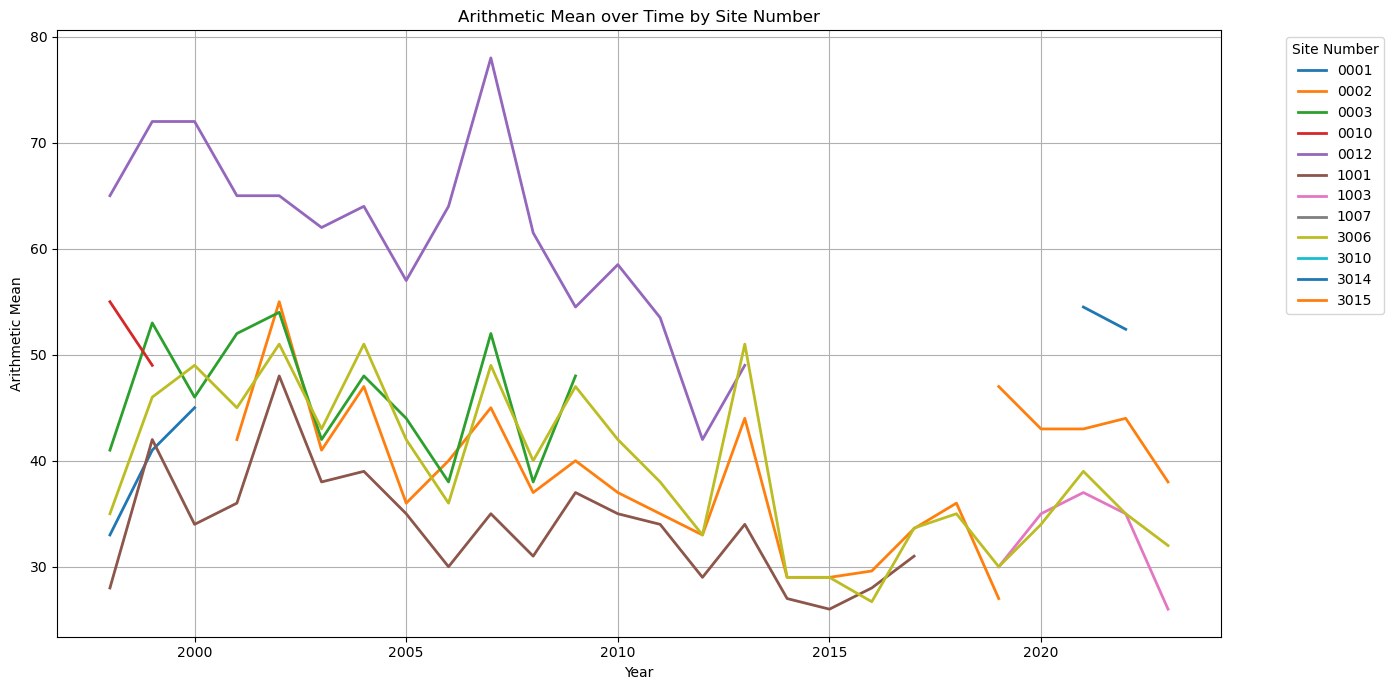

In [19]:
bc_grouped = bc_slc_annual_1960_2023.groupby(['site_number', 'year'])['ninetieth_percentile'].mean().reset_index()

# Pivot the DataFrame to have years as columns, which makes it easier to plot.
bc_pivoted = bc_grouped.pivot(index='year', columns='site_number', values='ninetieth_percentile')

# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size for better readability

# Loop through each column (site_number) to plot
for column in bc_pivoted.columns:
    plt.plot(bc_pivoted.index, bc_pivoted[column], marker='', linewidth=2, label=column)

plt.legend(title='Site Number', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Arithmetic Mean over Time by Site Number')
plt.xlabel('Year')
plt.ylabel('Arithmetic Mean')
plt.grid(True)

plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

In [20]:
# wikipedia option
wiki_NWlat = 40.978
wiki_NWlng = -112.130
wiki_SElat = 40.548
wiki_SElng = -111.806

wiki_min_lat = str(wiki_SElat)
wiki_max_lat = str(wiki_NWlat)
wiki_min_lon = str(wiki_NWlng)
wiki_max_lon = str(wiki_SElng)

wiki_slc_annual_1960_2023 = fetch_and_combine_data(aqs_email=aqs_email,
                  aqs_pw=aqs_pw,
                  param=pm10_param,
                  minlat=wiki_min_lat,
                  maxlat=wiki_max_lat,
                  minlon=wiki_min_lon,
                  maxlon=wiki_max_lon)

In [21]:
wiki_slc_annual_1960_2023.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'sample_duration_code',
       'sample_duration', 'pollutant_standard', 'metric_used', 'method',
       'year', 'units_of_measure', 'event_type', 'observation_count',
       'observation_percent', 'validity_indicator', 'valid_day_count',
       'required_day_count', 'exceptional_data_count',
       'null_observation_count', 'primary_exceedance_count',
       'secondary_exceedance_count', 'certification_indicator',
       'arithmetic_mean', 'standard_deviation', 'first_max_value',
       'first_max_datetime', 'second_max_value', 'second_max_datetime',
       'third_max_value', 'third_max_datetime', 'fourth_max_value',
       'fourth_max_datetime', 'first_max_nonoverlap_value',
       'first_max_n_o_datetime', 'second_max_nonoverlap_value',
       'second_max_n_o_datetime', 'ninety_ninth_percentile',
       'ninety_eighth_percentile', 'ninety_fifth_percentile'

In [22]:
wiki_slc_annual_1960_2023['cbsa_code'].value_counts()

41620    95
Name: cbsa_code, dtype: int64

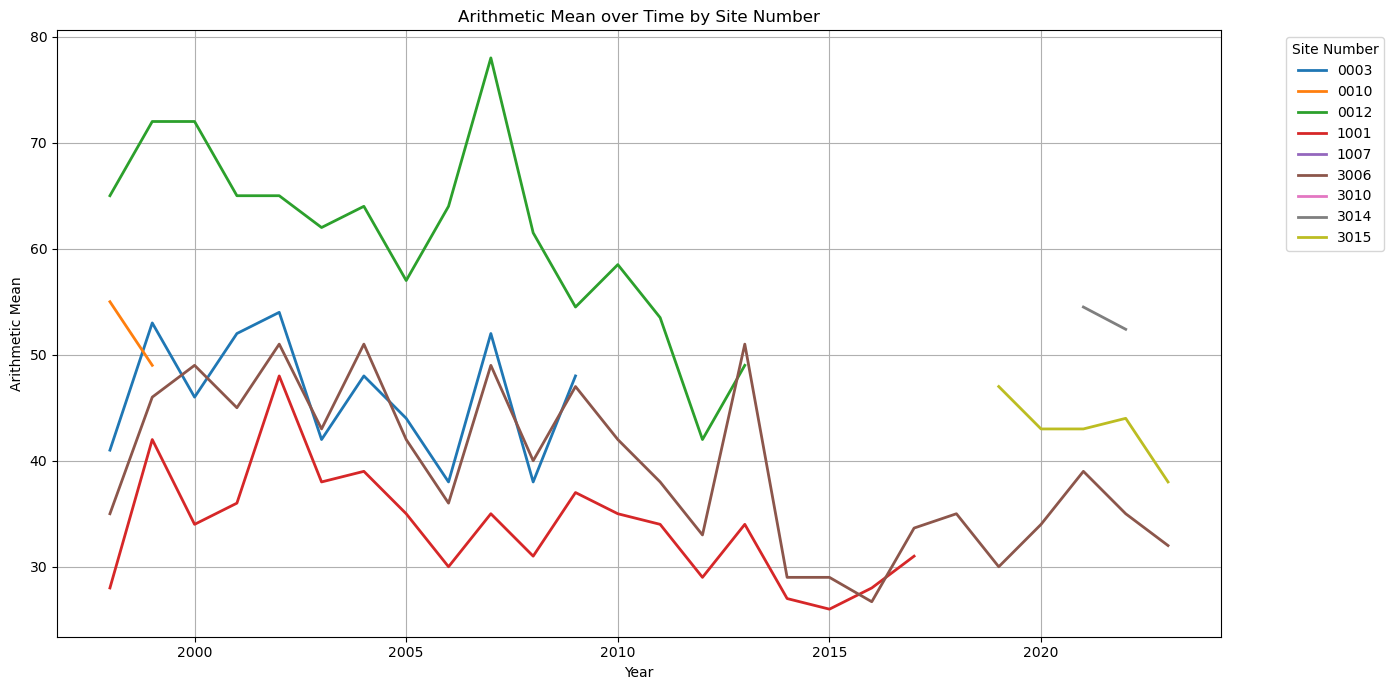

In [23]:
wiki_grouped = wiki_slc_annual_1960_2023.groupby(['site_number', 'year'])['ninetieth_percentile'].mean().reset_index()

# Pivot the DataFrame to have years as columns, which makes it easier to plot.
wiki_pivoted = wiki_grouped.pivot(index='year', columns='site_number', values='ninetieth_percentile')

# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size for better readability

# Loop through each column (site_number) to plot
for column in wiki_pivoted.columns:
    plt.plot(wiki_pivoted.index, wiki_pivoted[column], marker='', linewidth=2, label=column)

plt.legend(title='Site Number', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Arithmetic Mean over Time by Site Number')
plt.xlabel('Year')
plt.ylabel('Arithmetic Mean')
plt.grid(True)

plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

In [24]:
# brigham city option 2
bc2_NWlat = 41.523
bc2_NWlng = -112.130
bc2_SElat = 40.548
bc2_SElng = -111.806

bc2_min_lat = str(bc2_SElat)
bc2_max_lat = str(bc2_NWlat)
bc2_min_lon = str(bc2_NWlng)
bc2_max_lon = str(bc2_SElng)

bc2_slc_annual_1960_2023 = fetch_and_combine_data(aqs_email=aqs_email,
                  aqs_pw=aqs_pw,
                  param=pm10_param,
                  minlat=bc2_min_lat,
                  maxlat=bc2_max_lat,
                  minlon=bc2_min_lon,
                  maxlon=bc2_max_lon)

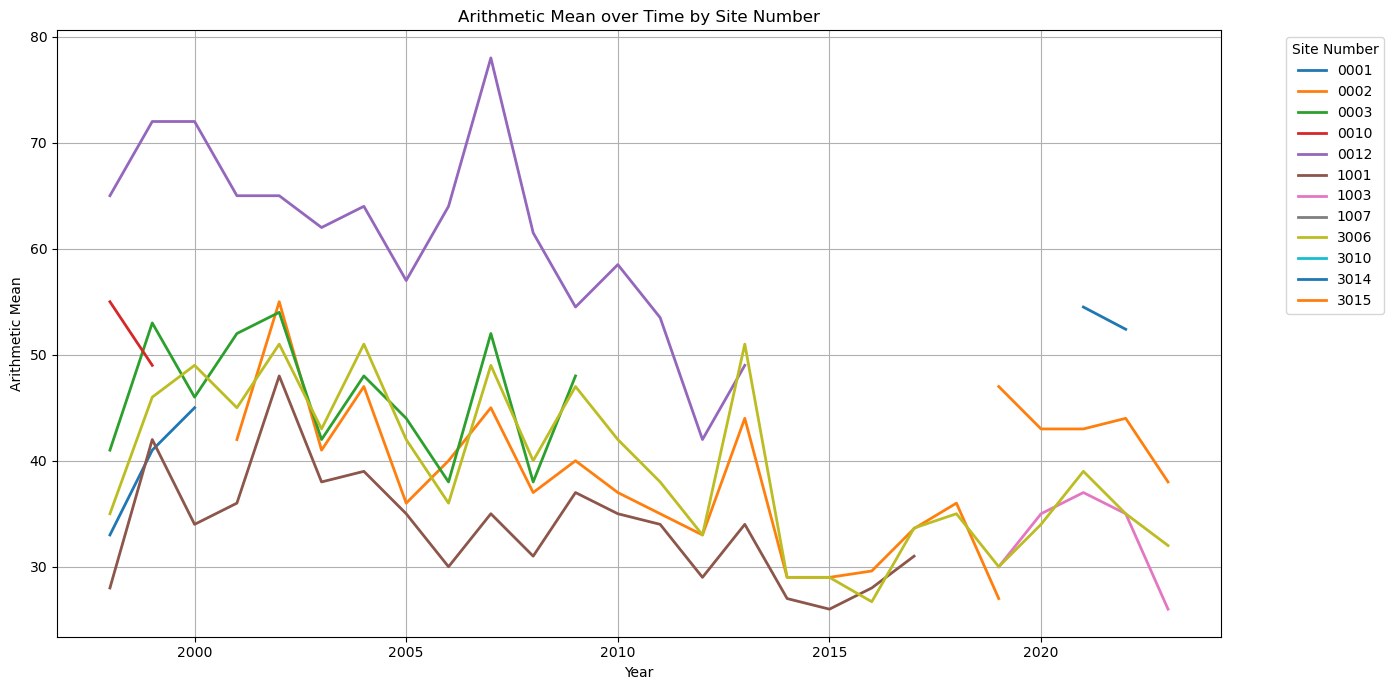

In [25]:
bc2_grouped = bc2_slc_annual_1960_2023.groupby(['site_number', 'year'])['ninetieth_percentile'].mean().reset_index()

# Pivot the DataFrame to have years as columns, which makes it easier to plot.
bc2_pivoted = bc2_grouped.pivot(index='year', columns='site_number', values='ninetieth_percentile')

# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size for better readability

# Loop through each column (site_number) to plot
for column in bc2_pivoted.columns:
    plt.plot(bc2_pivoted.index, bc2_pivoted[column], marker='', linewidth=2, label=column)

plt.legend(title='Site Number', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Arithmetic Mean over Time by Site Number')
plt.xlabel('Year')
plt.ylabel('Arithmetic Mean')
plt.grid(True)

plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

In [26]:
# SLC to Ogden
slog_NWlat = 41.325
slog_NWlng = -112.130
slog_SElat = 40.548
slog_SElng = -111.806

slog_min_lat = str(slog_SElat)
slog_max_lat = str(slog_NWlat)
slog_min_lon = str(slog_NWlng)
slog_max_lon = str(slog_SElng)

slog_slc_annual_1960_2023 = fetch_and_combine_data(aqs_email=aqs_email,
                  aqs_pw=aqs_pw,
                  param=pm10_param,
                  minlat=slog_min_lat,
                  maxlat=slog_max_lat,
                  minlon=slog_min_lon,
                  maxlon=slog_max_lon)

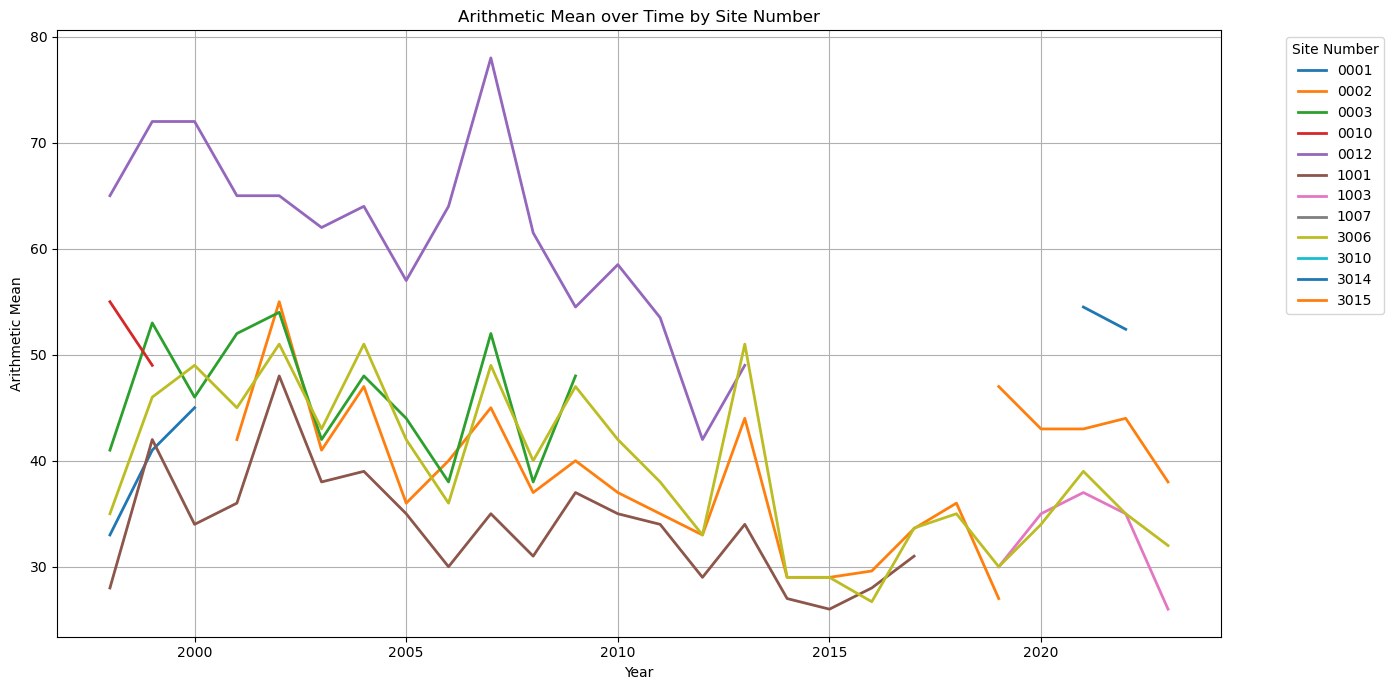

In [28]:
slog_grouped = slog_slc_annual_1960_2023.groupby(['site_number', 'year'])['ninetieth_percentile'].mean().reset_index()

# Pivot the DataFrame to have years as columns, which makes it easier to plot.
slog_pivoted = slog_grouped.pivot(index='year', columns='site_number', values='ninetieth_percentile')

# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size for better readability

# Loop through each column (site_number) to plot
for column in slog_pivoted.columns:
    plt.plot(slog_pivoted.index, slog_pivoted[column], marker='', linewidth=2, label=column)

plt.legend(title='Site Number', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Arithmetic Mean over Time by Site Number')
plt.xlabel('Year')
plt.ylabel('Arithmetic Mean')
plt.grid(True)

plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

In [37]:
# open variables json and assign to p_air_vars variable
with open("../../src/coordinates.json") as f:
    coordinates = json.load(f)
coordinates

{'map_box': {'map_NWlat': 41.66,
  'map_NWlong': -113.42,
  'map_SElat': 40.31,
  'map_SElong': -110.58},
 'sensor_box': {'sensor_NWlat': 41.325,
  'sensor_NWlng': -112.13,
  'sensor_SElat': 40.548,
  'sensor_SElng': -111.806}}

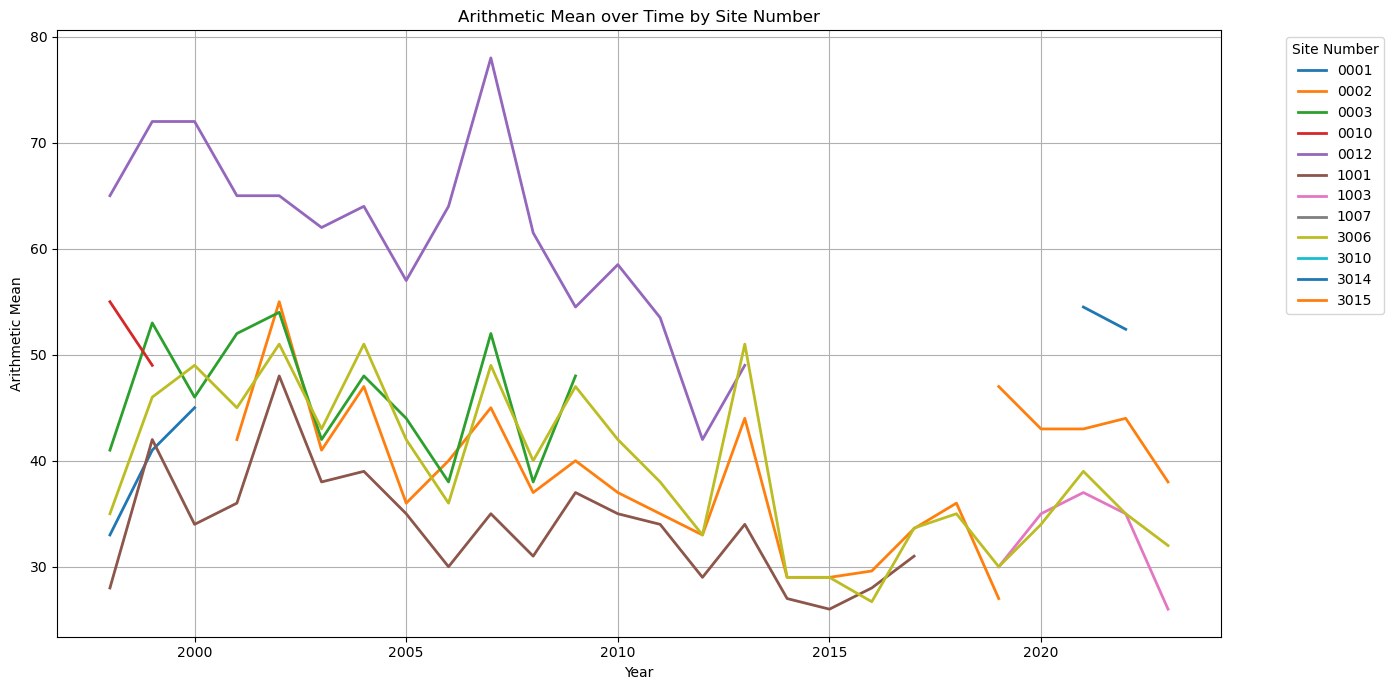

In [39]:
# SLC to Ogden
slog_NWlat = coordinates['sensor_box']['sensor_NWlat']
slog_NWlng = coordinates['sensor_box']['sensor_NWlng']
slog_SElat = coordinates['sensor_box']['sensor_SElat']
slog_SElng = coordinates['sensor_box']['sensor_SElng']

slog_min_lat = str(slog_SElat)
slog_max_lat = str(slog_NWlat)
slog_min_lon = str(slog_NWlng)
slog_max_lon = str(slog_SElng)

slog_slc_annual_1960_2023 = fetch_and_combine_data(aqs_email=aqs_email,
                  aqs_pw=aqs_pw,
                  param=pm10_param,
                  minlat=slog_min_lat,
                  maxlat=slog_max_lat,
                  minlon=slog_min_lon,
                  maxlon=slog_max_lon)


slog_grouped = slog_slc_annual_1960_2023.groupby(['site_number', 'year'])['ninetieth_percentile'].mean().reset_index()

# Pivot the DataFrame to have years as columns, which makes it easier to plot.
slog_pivoted = slog_grouped.pivot(index='year', columns='site_number', values='ninetieth_percentile')

# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size for better readability

# Loop through each column (site_number) to plot
for column in slog_pivoted.columns:
    plt.plot(slog_pivoted.index, slog_pivoted[column], marker='', linewidth=2, label=column)

plt.legend(title='Site Number', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Arithmetic Mean over Time by Site Number')
plt.xlabel('Year')
plt.ylabel('Arithmetic Mean')
plt.grid(True)

plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()